# Homework 1
### Zheling Zhang
### January 15, 2024


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

## Load data 

In [2]:
x = pd.read_csv('./CSVs/x.csv')
y = pd.read_csv('./CSVs/y.csv')
x_new = pd.read_csv('./CSVs/xnew.csv')
px1 = pd.read_csv('./CSVs/px1.csv')
px2 = pd.read_csv('./CSVs/px2.csv')
prob = pd.read_csv('./CSVs/prob.csv')

## Plot the decision boundary

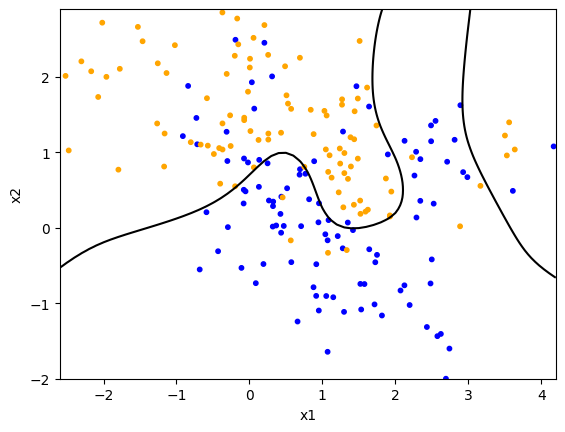

In [3]:
def plot_mix_data(x, y, px1, px2, prob):
    px1, px2 = np.meshgrid(px1.values, px2.values)

    plt.scatter(x[:,0], x[:, 1], c = np.where(y[:, 0] == 0, 'blue', 'orange'), s = 10)
    plt.xlabel('x1')
    plt.ylabel('x2')


    plt.contour(px1, px2, prob.reshape(px1.shape), levels = [0.5], colors = 'black') 

    plt.show()

plot_mix_data(x.values, y.values, px1, px2, prob.values)

## Revise the fit_lc and predict_lc function

By adding the squared term for x1 and x2.

In [4]:
def fit_lc(y, x):
    x = x.rename(columns={'V1': 'x1', 'V2': 'x2'})

    # Add squared terms for x1 and x2
    x['x1_squared'] = x['x1'] ** 2
    x['x2_squared'] = x['x2'] ** 2

    model = LinearRegression()
    model.fit(x, y)
    return model

def predict_lc(model, x):
    if 'V1' in x.columns and 'V2' in x.columns:
        x = x.rename(columns={'V1': 'x1', 'V2': 'x2'})

    # Add squared terms for x1 and x2 in the prediction phase as well
    x['x1_squared'] = x['x1'] ** 2
    x['x2_squared'] = x['x2'] ** 2

    return model.predict(x)

## Check the functionality

In [6]:
predict_lc(fit_lc(y, x), x_new)

array([[-0.11887222],
       [-0.12632115],
       [-0.13362327],
       ...,
       [ 0.93334589],
       [ 0.93558575],
       [ 0.93797241]])

## Plot the decision boundary after revision

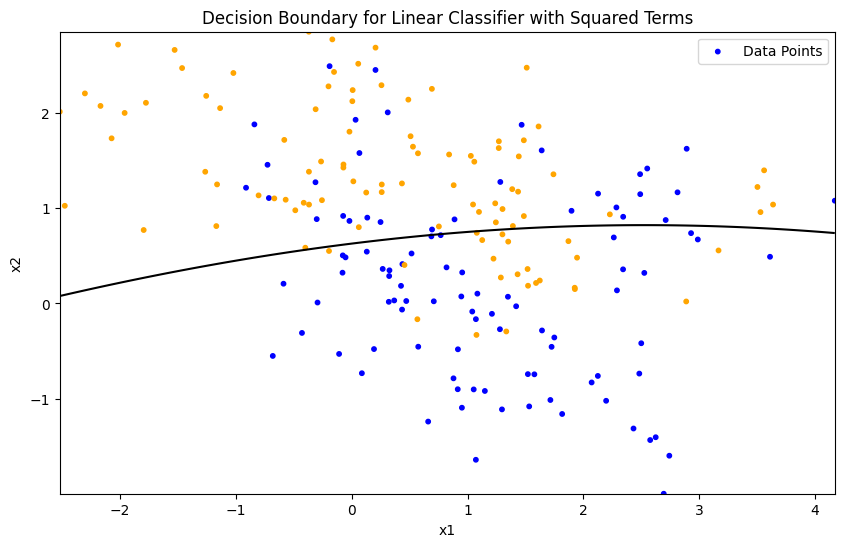

In [7]:
x1_range = np.linspace(x['V1'].min(), x['V1'].max(), 100)
x2_range = np.linspace(x['V2'].min(), x['V2'].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = pd.DataFrame({
    'x1': xx1.ravel(),
    'x2': xx2.ravel(),
    'x1_squared': xx1.ravel()**2,
    'x2_squared': xx2.ravel()**2
})

# Predicting over the grid
Z = predict_lc(fit_lc(y, x), grid)
Z = Z.reshape(xx1.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x['V1'], x['V2'], c=np.where(y['x'] == 0, 'blue', 'orange'), s=10, label='Data Points')
plt.contour(xx1, xx2, Z, levels=[0.5], colors='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary for Linear Classifier with Squared Terms')
plt.legend()
plt.show()

## Conclusion

By adding the squared terms, it reduces the bias by enabling the model to better capture the true relationship, but it increases the variance as the model becomes more sensitive to fluctuations in the training data, potentially leads to overfitting.